In [2]:
import plotly as p
import plotly.plotly as py
import plotly.graph_objs as go

In [3]:
import requests
import pandas
import matplotlib.pyplot as plt
import math

In [4]:
res = requests.get('https://charts.bitcoin.com/api/chart/price')
res2 = requests.get('https://charts.bitcoin.com/api/chart/daily-transactions')
res3 = requests.get('https://charts.bitcoin.com/api/chart/transaction-value')

In [5]:
d = res.json()
d2 = res2.json()
d3 = res3.json()

In [6]:
df = pandas.DataFrame(d)
df2 = pandas.DataFrame(d2)
df3 = pandas.DataFrame(d3)

In [7]:
date=[]
price=[]
for i in d:
	i[0] = pandas.to_datetime(i[0],unit='s')
	date.append(i[0])
	price.append(i[1])

In [8]:
date=[]
dailyTrans=[]
for i in d2:
	i[0] = pandas.to_datetime(i[0],unit='s')
	date.append(i[0])
	dailyTrans.append(i[1])

In [9]:
date=[]
transVal=[]
for i in d3:
	i[0] = pandas.to_datetime(i[0],unit='s')
	date.append(i[0])
	transVal.append(i[1])

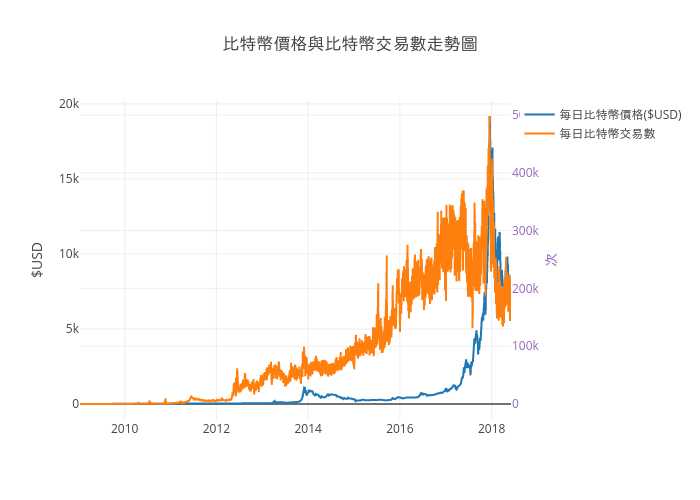

In [17]:
trace11 = go.Scatter(
    x=date,
    y=price,
    name='每日比特幣價格($USD)'
)

trace21 = go.Scatter(
    x=date,
    y=dailyTrans,
    name='每日比特幣交易數',
    yaxis='y2'
)

layout = go.Layout(
    barmode='stack'
)

layout = go.Layout(
    title='比特幣價格與比特幣交易數走勢圖',
    yaxis=dict(
        title='$USD'
    ),
    yaxis2=dict(
        title='次',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
    
)
data = [trace11, trace21]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')
py.image.save_as(fig, filename='price&transaction.png')
from IPython.display import Image
Image('price&transaction.png')

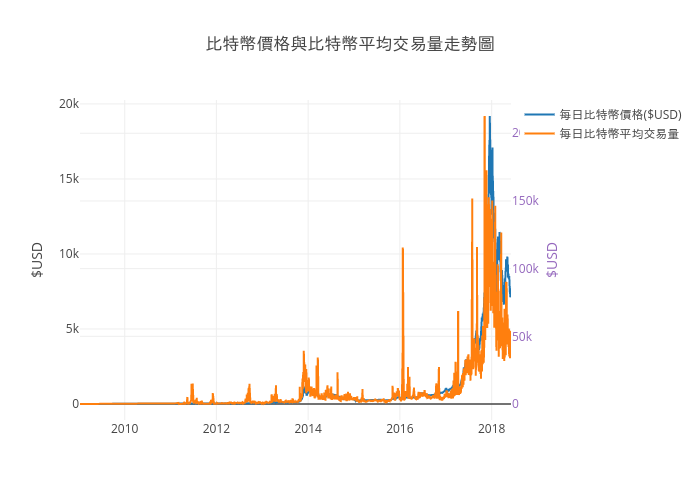

In [18]:
trace11 = go.Scatter(
    x=date,
    y=price,
    name='每日比特幣價格($USD)'
)

trace31 = go.Scatter(
    x=date,
    y=transVal,
    name='每日比特幣平均交易量',
    yaxis='y2'
)
layout = go.Layout(
    barmode='stack'
)
layout = go.Layout(
    title='比特幣價格與比特幣平均交易量走勢圖',
    yaxis=dict(
        title='$USD'
    ),
    yaxis2=dict(
        title='$USD',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
    
)
data = [trace11, trace31]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')
py.image.save_as(fig, filename='price&transaction_Val.png')
from IPython.display import Image
Image('price&transaction_Val.png')

In [11]:
def mean(x):
    return sum(x) / len(x)

def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]


def variance(x):
    deviations = de_mean(x)
    variance_x = 0
    for d in deviations:
        variance_x += d**2
    variance_x /= len(x)
    return variance_x


def dot(x, y):
    dot_product = sum(v_i * w_i for v_i, w_i in zip(x, y))
    dot_product /= (len(x))
    return dot_product

def correlation(x, y):
    variance_x = variance(x)
    variance_y = variance(y)
    sd_x = math.sqrt(variance_x)
    sd_y = math.sqrt(variance_y)
    dot_xy = dot(de_mean(x), de_mean(y))
    return dot_xy/(sd_x*sd_y)

In [12]:
correlation(price, dailyTrans)

0.5693975165531331

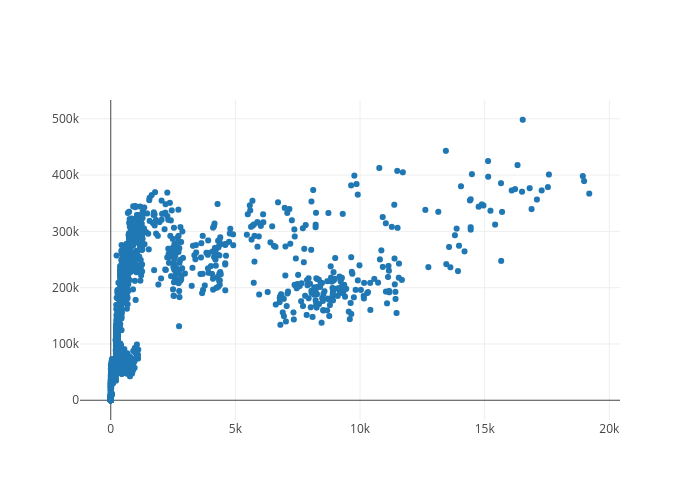

In [21]:
trace1 = go.Scatter(
    x = price,
    y = dailyTrans,
    mode = 'markers')
data4 = [trace1]
py.iplot(data4, filename='basic-scatter')
py.image.save_as(data4, filename='priceVStransaction.png')
from IPython.display import Image
Image('priceVStransaction.png')

In [16]:
correlation(price, transVal)

0.9118304046585666

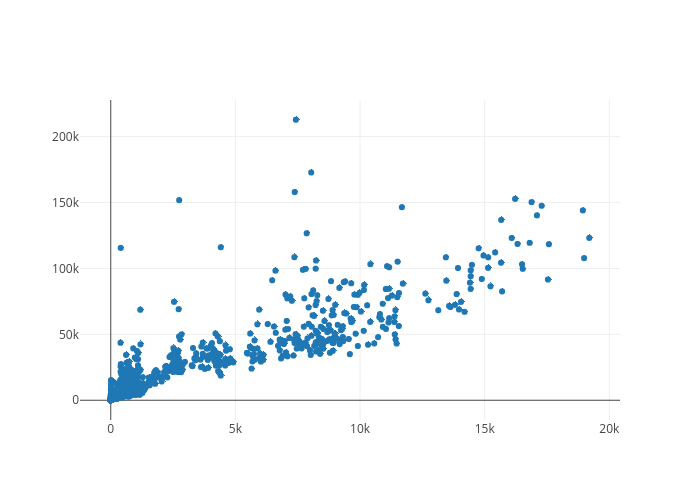

In [22]:
trace2 = go.Scatter(
    x = price,
    y = transVal,
    mode = 'markers'
)

data5 = [trace2]
py.iplot(data5, filename='basic-scatter')
py.image.save_as(data5, filename='priceVStransaction_Val.png')
from IPython.display import Image
Image('priceVStransaction_Val.png')